In [36]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
%matplotlib inline

In [73]:
q = QuantumCircuit(5,5)

q.h(0) # rotates pi/2 on the Y:  |0> --> (|0> + |1>)/sqrt(2) - superposition

q.x(1)
q.h(1) # rotates -pi/2 on the Y: |1> --> (|0> - |1>)/sqrt(2) - superposition

 

q.h(2) # undo the superposition getting back to the original value
q.h(2) # H|0> + H|1> == (|0> + |1>)/sqrt(2) + (|0> - |1>)/sqrt(2) = 2((|0>)/sqrt(2)) 
# measurement do the pow2 so there we have the 100% probability of a |0>

q.x(3) # undo the superposition getting back to the original value
q.h(3) # H|1> - H|0> == (|0> - |1>)/sqrt(2) - (|0> + |1>)/sqrt(2) = 2((|1>)/sqrt(2))
q.h(3) # measurement do the pow2 so there we have the 100% probability of a |1>


q.h(4)
q.x(4) # does nothing as it rotates pi on the X ¯\_(ツ)_/¯

q.draw()

┌───┐          
q_0: ┤ H ├──────────
     ├───┤┌───┐     
q_1: ┤ X ├┤ H ├─────
     ├───┤├───┤     
q_2: ┤ H ├┤ H ├─────
     ├───┤├───┤┌───┐
q_3: ┤ X ├┤ H ├┤ H ├
     ├───┤├───┤└───┘
q_4: ┤ H ├┤ X ├─────
     └───┘└───┘     
c: 5/═══════════════

In [74]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(q, backend=simulator, shots=1).result()
state_vector = result.get_statevector()
print(state_vector)

[ 1.32561289e-33-2.16489014e-17j  1.32561289e-33-2.16489014e-17j
  1.32561289e-33+2.16489014e-17j  1.32561289e-33+2.16489014e-17j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  3.53553391e-01-4.49139764e-34j  3.53553391e-01+0.00000000e+00j
 -3.53553391e-01+4.32978028e-17j -3.53553391e-01+4.32978028e-17j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  1.32561289e-33-2.16489014e-17j  1.32561289e-33-2.16489014e-17j
  1.32561289e-33+2.16489014e-17j  1.32561289e-33+2.16489014e-17j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  3.53553391e-01-4.49139764e-34j  3.53553391e-01+0.00000000e+00j
 -3.53553391e-01+4.32978028e-17j -3.53553391e-01+4.32978028e-17j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

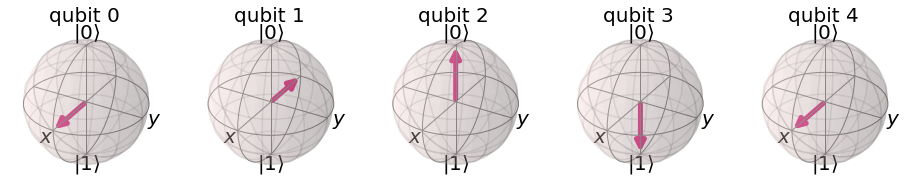

In [75]:
plot_bloch_multivector(state_vector)